In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import bmcs_utils.api as bu
bu.set_latex_mpl_format()

In [2]:
def get_load_disp_data(test_num):
    path = os.path.join('results', 'dehnkoerper', 'D' + str(test_num) + '.csv')
    test_data = np.array(pd.read_csv(path, delimiter=';', decimal=',', skiprows=1, encoding= 'unicode_escape'))
    load = test_data[:, 1]
    blau_vorne_links = test_data[:, 3]
    gelb_vorne_rechts = test_data[:, 4]
    gruen_hinten_links = test_data[:, 5]
    rot_hinten_rechts = test_data[:, 6]
    
    if test_num == 1 or test_num == 3:
        disp = np.average([gruen_hinten_links, rot_hinten_rechts], axis=0)
    else:
        disp = np.average([blau_vorne_links, gelb_vorne_rechts, gruen_hinten_links, rot_hinten_rechts], axis=0)

    return -load, -disp

def get_stress_strain(test_num):
    load, disp = get_load_disp_data(test_num)
    
    # measuring_dist: in [mm] taken as the average of measuring distances for relevant LVDTs
    measuring_dist = [460, 459, 460, 461, 455]
    b = np.array([120, 120.3, 119.7, 122.3, 120])
    t = np.array([30.3, 30.3, 30, 30, 32.3])
    A = b * t
    
    strain = disp / measuring_dist[test_num - 1]
    stress = load * 1000 / A[test_num - 1]
    return stress, strain, A, measuring_dist

## Stress-strain curves

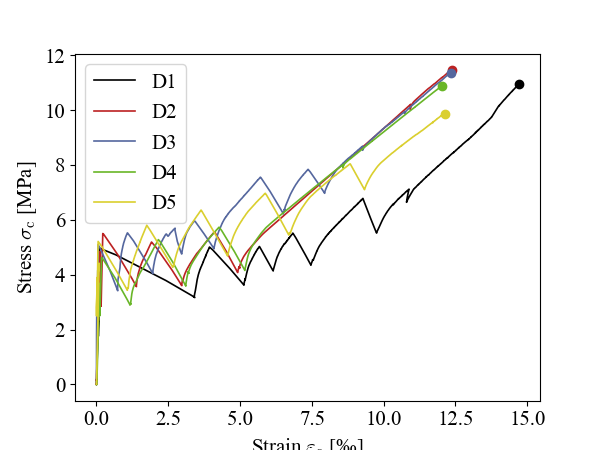

In [3]:
fig, ax = plt.subplots(figsize=(6, 4.5))

avg_stress = []
avg_strain = []

for i in range(5):
    color = bu.plot_colors[i]
    stress, strain, _, _ = get_stress_strain(i + 1)
    strain = 1000 * strain
    ax.plot(strain, stress, label='D' + str(i + 1), c=color, lw=1.2)
    ax.plot(np.max(strain), np.max(stress), 'o', c=color)
    ax.set_ylabel(r'Stress $\sigma_\mathrm{c}$ [MPa]')
    ax.set_xlabel(r'Strain $\varepsilon_\mathrm{c}$ [‰]')
    avg_stress.append(stress)
    avg_strain.append(strain)

# ax.plot(strain, stress, label='D' + str(i + 1), c=color, lw=1.2)
    
ax.legend()
fig.savefig('D1_to_D5_stress_strain_curves.pdf')

## Load-displacement curves

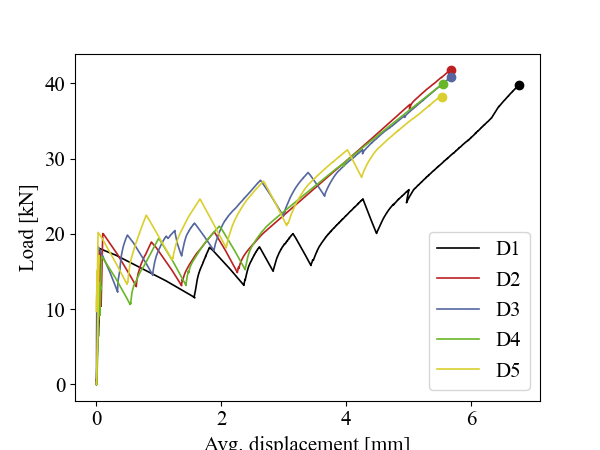

In [4]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for i in range(5):
    color = bu.plot_colors[i]
    load, disp = get_load_disp_data(i + 1)
    ax.plot(disp, load, label='D' + str(i + 1), c=color, lw=1.2)
    ax.plot(np.max(disp), np.max(load), 'o', c=color)
    ax.set_ylabel(r'Load [kN]')
    ax.set_xlabel(r'Avg. displacement [mm]')

ax.legend()
fig.savefig('D1_to_D5_load_displacement_curves.pdf')

## Table with results summary

In [5]:
tests_num = 5

print(' 	', end = '')
for i in range(tests_num):
    print('D' + str(i + 1) + '	', end = '\n' if i == 4 else '')
    
print('Cross-section area [mm^2]	', end = '')
for i in range(tests_num):
    _, _, A, _ = get_stress_strain(i + 1)
    print(str(np.round(A[i], 0))[:-2] + '	', end = '\n' if i == 4 else '')
    
print('Exact avg. measuring distance [mm]	', end = '')
for i in range(tests_num):
    _, _, _, measuring_dist = get_stress_strain(i + 1)
    print(str(measuring_dist[i]) + '	', end = '\n' if i == 4 else '')
    
print('Max force [kN]	', end = '')
for i in range(tests_num):
    load, _ = get_load_disp_data(i + 1)
    print(str(np.max(load)) + '	', end = '\n' if i == 4 else '')
    
print('Max displacement [mm]	', end = '')
for i in range(tests_num):
    _, disp = get_load_disp_data(i + 1)
    print(str(np.round(np.max(disp), 1))+ '	', end = '\n' if i == 4 else '')
    
print('Max stress [MPa]	', end = '')
for i in range(tests_num):
    stress, _, _, _ = get_stress_strain(i + 1)
    print(str(np.round(np.max(stress), 2)) + '	', end = '\n' if i == 4 else '')

print('Max strain [‰]	', end = '')
for i in range(tests_num):
    _, strain, _, _ = get_stress_strain(i + 1)
    print(str(np.round(np.max(1000 * strain), 1)) + '	', end = '\n' if i == 4 else '')
    
# You can copy the resulting text to notepad then copy it directly to excel to get a table

 	D1	D2	D3	D4	D5	
Cross-section area [mm^2]	3636	3645	3591	3669	3876	
Exact avg. measuring distance [mm]	460	459	460	461	455	
Max force [kN]	39.81	41.82	40.81	39.93	38.26	
Max displacement [mm]	6.8	5.7	5.7	5.5	5.5	
Max stress [MPa]	10.95	11.47	11.36	10.88	9.87	
Max strain [‰]	14.7	12.4	12.4	12.0	12.1	
